This notebook covers:


1.   Naive Bayes Classifier
2.   Random Forest
3.   Gradient Boosted Decision Trees
4.   Neural Networks



## Naive Bayes Classifier

Based upon the Bayes theorem

The classifier assumes that the features are independent of each other or the features have no correlation with each other.

These classifiers have highly efficient learning and prediction but generalization performance is worse when compared to more sophisticated models.

3 types of naive bayes classifier are available in scikit learn:

Bernoulli: binary features

Multinomial: discrete features

Gaussian: continous/real-valued features (for each feature: mean, standard deviation is computed)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

Creating datasets for classification using Naive Bayes

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

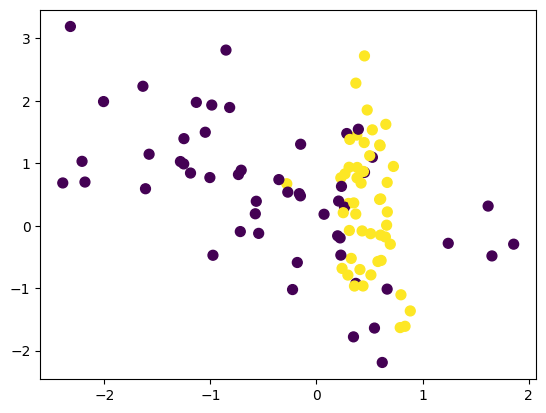

In [3]:
X,y = make_classification(n_samples=100,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=1,flip_y=0.1,class_sep=0.5,random_state=0)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=50)

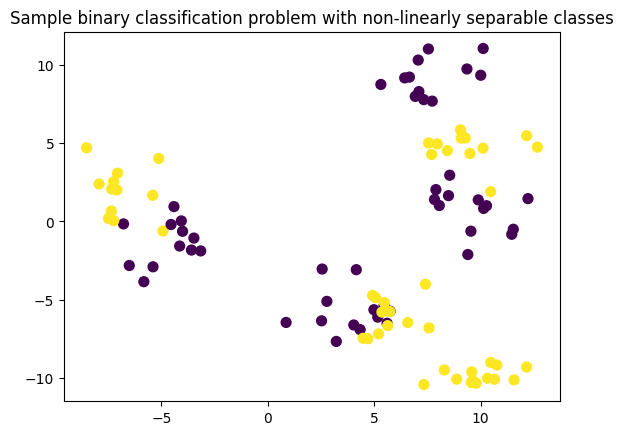

In [4]:
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50)
plt.show()

In [5]:
from sklearn.naive_bayes import GaussianNB

X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=0)

clf=GaussianNB().fit(X_train,y_train)
clf.score(X_test,y_test)

0.84

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf2= GaussianNB().fit(X_train,y_train)
clf2.score(X_test,y_test)

0.84

Application on Breast Cancer dataset

In [7]:
from numpy.lib.npyio import load
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
X= dataset.data
y=dataset.target

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf3 = GaussianNB().fit(X_train,y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(clf3.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(clf3.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


## Random Forests

An ensemble takes multiple individual learning models and combines them to produce an aggregate model that is more powerful than any of its individual learning models alone.

By combining different individual models into an ensemble, we can average out their individual mistakes to reduce the risk of overfitting while maintaining strong prediction performance.

Random forests are an example of the ensemble idea applied to decision trees.

In [9]:
from sklearn.ensemble import RandomForestClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf4= RandomForestClassifier(max_features = 8, random_state = 0).fit(X_train,y_train)

print('Breast cancer dataset')
print('Accuracy of RF classifier on training set: {:.2f}'
     .format(clf4.score(X_train, y_train)))
print('Accuracy of RF classifier on test set: {:.2f}'
     .format(clf4.score(X_test, y_test)))

Breast cancer dataset
Accuracy of RF classifier on training set: 1.00
Accuracy of RF classifier on test set: 0.97


## Gradient Boosted Decision Trees

Like random forest, gradient boosted trees used an ensemble of multiple tress to create more powerful prediction models for classification and regression.

Unlike the random forest method that builds and combines a forest of randomly different trees in parallel, the key idea of gradient boosted decision trees is that they build a series of trees. Where each tree is trained, so that it attempts to correct the mistakes of the previous tree in the series.

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf5= GradientBoostingClassifier(random_state = 0).fit(X_train,y_train)

print('Breast cancer dataset (learning_rate=0.1, max_depth=3)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf5.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}\n'
     .format(clf5.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.1, max_depth=3)
Accuracy of GBDT classifier on training set: 1.00
Accuracy of GBDT classifier on test set: 0.97



In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

clf6= GradientBoostingClassifier(learning_rate = 0.01, max_depth = 2,random_state = 0).fit(X_train,y_train)

print('Breast cancer dataset (learning_rate=0.01, max_depth=2)')
print('Accuracy of GBDT classifier on training set: {:.2f}'
     .format(clf6.score(X_train, y_train)))
print('Accuracy of GBDT classifier on test set: {:.2f}'
     .format(clf6.score(X_test, y_test)))

Breast cancer dataset (learning_rate=0.01, max_depth=2)
Accuracy of GBDT classifier on training set: 0.97
Accuracy of GBDT classifier on test set: 0.97


## Neural Networks

Text(0, 0.5, 'Activation function output')

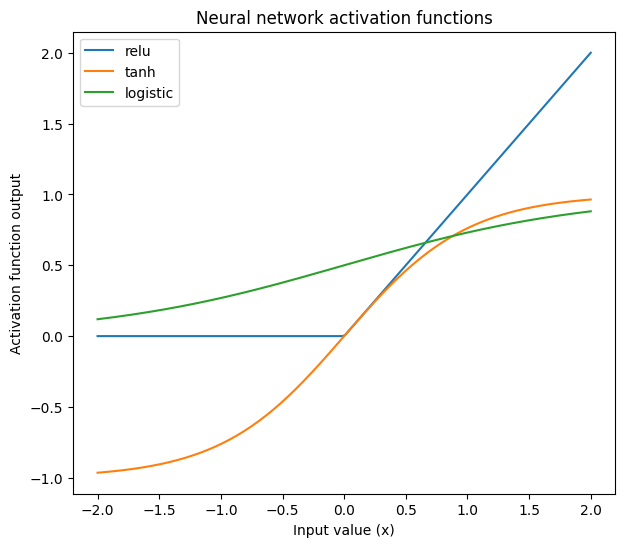

In [14]:
xrange = np.linspace(-2, 2, 200)

plt.figure(figsize=(7,6))

plt.plot(xrange, np.maximum(xrange, 0), label = 'relu')
plt.plot(xrange, np.tanh(xrange), label = 'tanh')
plt.plot(xrange, 1 / (1 + np.exp(-xrange)), label = 'logistic')
plt.legend()
plt.title('Neural network activation functions')
plt.xlabel('Input value (x)')
plt.ylabel('Activation function output')

In [16]:
from sklearn.neural_network import MLPClassifier

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

nnclf = MLPClassifier(hidden_layer_sizes = [10, 10], solver='lbfgs',
                     random_state = 0).fit(X_train, y_train)

print('Breast cancer dataset (2 hidden layers with 10 units each)')
print('Accuracy of neural networks classifier on training set: {:.2f}'
     .format(nnclf.score(X_train, y_train)))
print('Accuracy of neural networks classifier on test set: {:.2f}'
     .format(nnclf.score(X_test, y_test)))

Breast cancer dataset (2 hidden layers with 10 units each)
Accuracy of neural networks classifier on training set: 0.93
Accuracy of neural networks classifier on test set: 0.92


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [19]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

nnclf1 = MLPClassifier(hidden_layer_sizes = [50, 50], solver='lbfgs',activation = 'tanh',
                         alpha = 0.1,
                     random_state = 0).fit(X_train, y_train)

print('Breast cancer dataset (2 hidden layers with 50 units each, activation tanh and alpha [regularization]=0.1)')
print('Accuracy of neural networks classifier on training set: {:.2f}'
     .format(nnclf1.score(X_train, y_train)))
print('Accuracy of neural networks classifier on test set: {:.2f}'
     .format(nnclf1.score(X_test, y_test)))

Breast cancer dataset (2 hidden layers with 50 units each, activation tanh and alpha [regularization]=0.1)
Accuracy of neural networks classifier on training set: 0.95
Accuracy of neural networks classifier on test set: 0.91


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

nnclf2 = MLPClassifier(hidden_layer_sizes = [100, 100], alpha = 5.0,
                   random_state = 0, solver='lbfgs').fit(X_train_scaled, y_train)

print('Breast cancer dataset')
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(nnclf2.score(X_train_scaled, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(nnclf2.score(X_test_scaled, y_test)))

Breast cancer dataset
Accuracy of NN classifier on training set: 0.98
Accuracy of NN classifier on test set: 0.97


**All the above models can be used for supervised regression as well**